### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"social_network_ads.csv"`**, which includes information about users' age, gender, estimated salary, and whether they purchased a product or not. The dataset comprises the following columns:

- `user_id:` The unique identifier for each user.
- `gender:` The gender of the user.
- `age:` The age of the user.
- `estimated_salary:` The estimated salary of the user.
- `purchased:` Whether the user purchased the product or not (0 for No, 1 for Yes).
  
Your task is to use this dataset to build and evaluate a logistic regression model to predict whether a user will purchase the product based on their age, gender and estimated salary. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Dataset credits:** Akram (https://www.kaggle.com/datasets/akram24/social-network-ads)

**Import Necessary Libraries**

In [143]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



### Task 1: Data Preparation and Exploration

1. Import the data from the `"social_network_ads.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of users' age and estimated salary using scatter plots.

In [144]:
# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'
df = pd.read_csv("social_network_ads.csv")


# Step 2: Display the number of rows and columns in the dataset
print(df.shape)
# Step 3: Display the first few rows of the dataset to get an overview
print(df.head(5))


(400, 5)
    user_id  gender  age  estimated_salary  purchased
0  15624510    Male   19             19000          0
1  15810944    Male   35             20000          0
2  15668575  Female   26             43000          0
3  15603246  Female   27             57000          0
4  15804002    Male   19             76000          0


In [145]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
print(df.isna().sum())
print(df.gender.unique())

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64
['Male' 'Female']


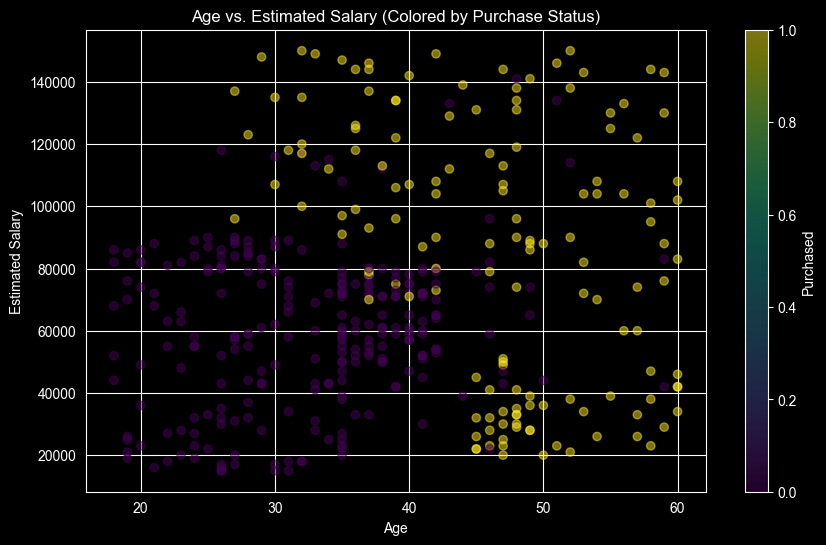

In [146]:
# Step 5: Visualize the distribution of users' age and estimated salary using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['estimated_salary'], c=df['purchased'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs. Estimated Salary (Colored by Purchase Status)')
plt.colorbar(label='Purchased')
plt.show()

### Task 2: Model Training Using Logistic Regression

1. Encode the `gender` column (Male as 0 and Female as 1).
2. Select the features `(age, estimated_salary, gender)` and the target variable `(purchased)` for modeling.
3. Split the data into training and test sets with a test size of 30%.
4. Initialize and train a Logistic Regression model using the training data.
5. Print the model's coefficients and intercept.

In [147]:
# Step 1: Encode the gender column (Male as 0 and Female as 1)
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
print(df["gender"].unique())
# Step 2: Select the features and target variable for modeling
X = df[["age", "estimated_salary", "gender"]]
y = df["purchased"]

# Step 3: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


[1 0]
(280, 3) (120, 3) (280,) (120,)


In [148]:
# Step 4: Initialize and train a Logistic Regression model using the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Print the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
model.score(X_test, y_test)

Model coefficients: [[2.23314402e-01 3.59184504e-05 3.30445283e-01]]
Model intercept: [-12.36927903]


/Users/minhaz74692/Documents/Personal/AI-ML/python-dsa/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8583333333333333

### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using a classification report, including precision, recall, and accuracy metrics.

In [149]:
# Step 1: Make predictions on the test set using the trained model
y_pred = model.predict(X_test)
print("Test Data ----------->\n", y_test.tolist())
print("\nPredicted Data ------------>\n",y_pred )

# Step 2: Evaluate the model using a classification report, including precision, recall, and accuracy metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("\nThe classification report is ------->>>>>\n", report)
# Here 0 means the class who don't purchase the product and 1 means the class who will purchase the product

Test Data ----------->
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]

Predicted Data ------------>
 [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0]

The classification report is ------->>>>>
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87

In [150]:
import math
def sigmoid_function(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(age, salary, gender):
    z = model.intercept_[0] + model.coef_[0][0] * age + model.coef_[0][1] * salary + model.coef_[0][2] * gender
    print("The z is: ", z)
    result = sigmoid_function(z)
    return result

print(model.coef_, model.intercept_)
print(X_test.head(2))

[[2.23314402e-01 3.59184504e-05 3.30445283e-01]] [-12.36927903]
     age  estimated_salary  gender
209   46             22000       0
280   59             88000       0


In [151]:
print("Check by sigmoid function: ", prediction_function(46, 22000, 0))

The z is:  -1.306610636123386
Check by sigmoid function:  0.2130545600320201


In [152]:
print("Predicted Probability ------->", model.predict_proba(X_test)[0])

Predicted Probability -------> [0.78694544 0.21305456]


Here predicted probability of not purchasing and the sigmoid function prediction are same (0.21305456)